<a href="https://colab.research.google.com/github/sjlippe/MAT-421/blob/main/MAT421_ModuleH_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Module H: 22.4, 22.5, 22.6

# Module 22.4 - Numerical Error

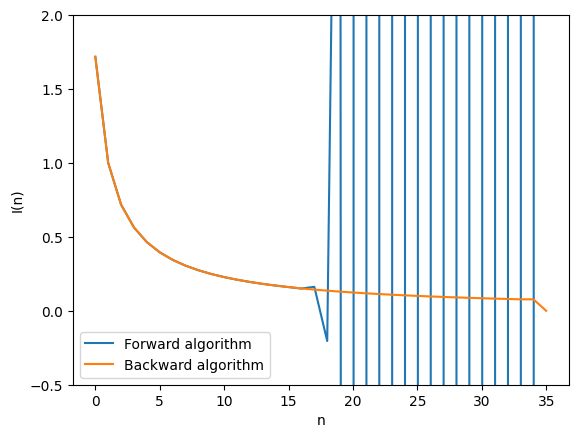

In [1]:
import numpy as np
import pylab

def Iforward(n):
    if n == 0:
        return np.e - 1
    return np.e - n * Iforward(n-1)

def Ibackward(n):
    if n >= 99:
        return 0
    return (np.e - Ibackward(n+1)) / (n+1)

N = 35
Iforward = [np.e - 1]
for n in range(1, N+1):
    Iforward.append(np.e - n * Iforward[n-1])

Ibackward = [0] * (N+1)
for n in range(N-1,-1,-1):
    Ibackward[n] = (np.e - Ibackward[n+1]) / (n+1)

n = range(N+1)
pylab.plot(n, Iforward, label='Forward algorithm')
pylab.plot(n, Ibackward, label='Backward algorithm')
pylab.ylim(-0.5, 2)
pylab.xlabel('n')
pylab.ylabel('I(n)')
pylab.legend()
pylab.show()

# Module 22.5 - Predictor-Corrector Method

In [3]:
# Python3 code for solving the differential equation
# using Predictor-Corrector or Modified-Euler method
# with the given conditions, y(0) = 0.5, step size(h) = 0.2
# to find y(1)
 
# consider the differential equation
# for a given x and y, return v
def f(x, y):
    v = y - 2 * x * x + 1;
    return v;
 
# predicts the next value for a given (x, y)
# and step size h using Euler method
def predict(x, y, h):
     
    # value of next y(predicted) is returned
    y1p = y + h * f(x, y);
    return y1p;
 
# corrects the predicted value
# using Modified Euler method
def correct(x, y, x1, y1, h):
     
    # (x, y) are of previous step
    # and x1 is the increased x for next step
    # and y1 is predicted y for next step
    e = 0.00001;
    y1c = y1;
 
    while (abs(y1c - y1) > e + 1):
        y1 = y1c;
        y1c = y + 0.5 * h * (f(x, y) + f(x1, y1));
 
    # every iteration is correcting the value
    # of y using average slope
    return y1c;
 
def printFinalValues(x, xn, y, h):
    while (x < xn):
        x1 = x + h;
        y1p = predict(x, y, h);
        y1c = correct(x, y, x1, y1p, h);
        x = x1;
        y = y1c;
 
    # at every iteration first the value
    # of for next step is first predicted
    # and then corrected.
    print("The final value of y at x =",
                     int(x), "is :", y);
 
# Driver Code
if __name__ == '__main__':
     
    # here x and y are the initial
    # given condition, so x=0 and y=0.5
    x = 0; y = 0.5;
 
    # final value of x for which y is needed
    xn = 1;
 
    # step size
    h = 0.2;
 
    printFinalValues(x, xn, y, h);

The final value of y at x = 1 is : 2.183872


# Module 22.6 - Python ODE Solvers

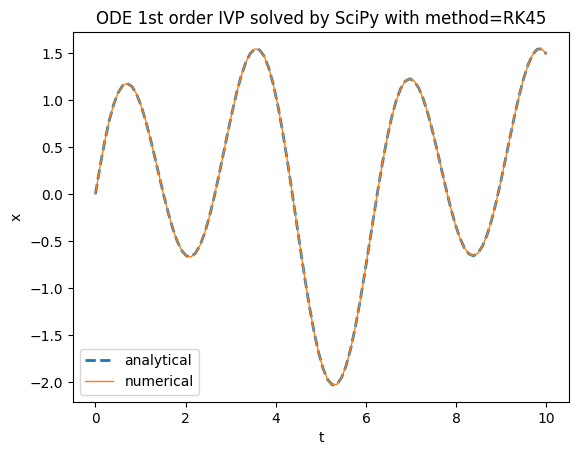

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

ode_fn = lambda t, x: np.sin(t) + 3. * np.cos(2. * t) - x

an_sol = lambda t : (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    (3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    (1./10.) * np.exp(-t)
t_begin=0.
t_end=10.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = 0.

x_an_sol = an_sol(t_space)

method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
num_sol = solve_ivp(ode_fn, [t_begin, t_end], [x_init], method=method, dense_output=True)
x_num_sol = num_sol.sol(t_space).T

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

For Tensor Flow:

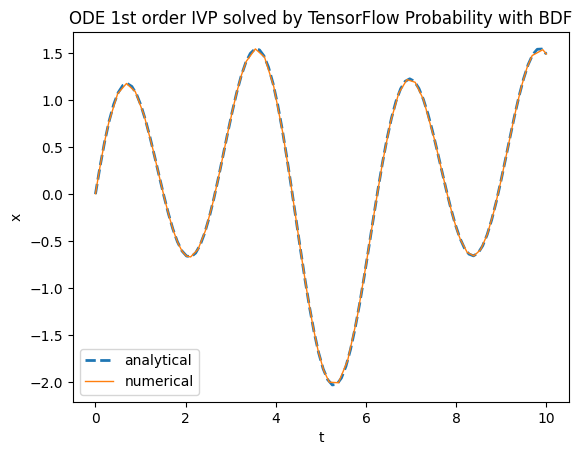

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp

ode_fn = lambda t, x: tf.math.sin(t) + tf.constant(3.) * tf.math.cos(tf.constant(2.) * t) - x

an_sol = lambda t : (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    (3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    (1./10.) * np.exp(-t)

t_begin=0.
t_end=10.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
t_init = tf.constant(t_begin)
x_init = tf.constant(0.)

x_an_sol = an_sol(t_space)

num_sol = tfp.math.ode.BDF().solve(ode_fn, t_init, x_init,
	solution_times=tfp.math.ode.ChosenBySolver(tf.constant(t_end)) )

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
plt.plot(num_sol.times, num_sol.states, linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by TensorFlow Probability with BDF')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()